# Experiment #7: Introduction to Deep Learning with PyTorch
<b>Mohammed Abed Alkareem</b>
<b>1210708</b>

## 1.1 Tensors

In [149]:
import torch
import numpy as np

### Tensor Initialization

#### 1. Directly from data

In [150]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

#### 2. From a NumPy array

In [151]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

#### 3. From another tensor:

In [152]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides thedatatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4767, 0.3808],
        [0.2664, 0.6272]]) 



#### 4. With random or constant values:

In [153]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8154, 0.5865, 0.4935],
        [0.7647, 0.6088, 0.6379]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Attributes

In [154]:
tensor = torch.rand(3, 4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


tensor([[0.9163, 0.4588, 0.4744, 0.5896],
        [0.3302, 0.7021, 0.9076, 0.2633],
        [0.2304, 0.6678, 0.4232, 0.0277]])

### Tensor Operations

In [155]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


#### 1. Standard numpy-like indexing and slicing:

In [156]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### 2. Joining tensors

In [157]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


#### 3. Multiplying tensors

In [158]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [159]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


#### 4. In-place operations

In [160]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### Bridge with NumPy

#### Tensor to NumPy array: A change in the tensor reflects in the NumPy array.

In [161]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#### NumPy array to Tensor: Changes in the NumPy array reflects in the tensor.

In [162]:
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 1.2 A Gentle Introduction to torch.autograd

### Differentiation in Autograd

In [163]:
import torch
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)



In [164]:
## We create another tensor Q from a and b.
##              Q = 3a3 − b2

Q = 3*a**3 - b**2

Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [165]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [166]:
a.grad

tensor([36., 81.])

In [167]:
b.grad

tensor([-12.,  -8.])

In [168]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [169]:
## We create another tensor Q from a and b.
##              Q = 3a3 − ab2

Q = 3*a**3 - a*b**2
Q

tensor([-48.,  33.], grad_fn=<SubBackward0>)

In [170]:
a.grad

tensor([36., 81.])

In [171]:
b.grad

tensor([-12.,  -8.])

#### Task 1:
  Use  autograd  to  compute  the  gradients  of Y w.r.t. x1 and x2 at  the  point(x1, x2) = (1,1).  
  WhereY= (3x1−2x2−2)2.Verify your results by computing the gradients analytically.

In [172]:
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

Y = (3*x1 -2 * x2 -2)**2

Y

tensor(1., grad_fn=<PowBackward0>)

In [173]:
Y.backward()

# Print the gradients
gradient_x1 = x1.grad
gradient_x2 = x2.grad

print("Gradient with respect to x1:", gradient_x1.item())
print("Gradient with respect to x2:", gradient_x2.item())

Gradient with respect to x1: -6.0
Gradient with respect to x2: 4.0


- ∂Y/∂x1 = 6(3x1−2x2−2)

X1 = 1 , x2 = 1 ==> ∂Y/∂x1 = 6*3*1 - 12*1 -12 = -6

- ∂Y/∂x2 = -4(3x1−2x2−2)

X1 = 1 , x2 = 1 ==> ∂Y/∂x1 = -4*3*1 + 8*1 + 8 = 4

## 1.3    Building Models with PyTorch

In [176]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        # # 784 is the input dimension, and 64 is the output dimenstion of the first hidden layer
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # apply the first layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [177]:
params = list(net.parameters())

print(len(params))

for p in params:
    print(p.size())

6
torch.Size([64, 784])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


#### Task 2:  
Identify what are the parameters that are printed in the previous code.

- torch.Size([64, 784])

    for layer 1 784 input , 64 output
    

- torch.Size([64])

    the output from the first layer out of the activation function

- torch.Size([64, 64])

    for layer 2 64 input , 64 output

- torch.Size([64])

    the output from the second layer out of the activation function


- torch.Size([10, 64])

    for layer 2 64 input , 10 output


- torch.Size([10])

    the output from the third (output) layer out of the activation function

#### Random input

In [178]:
input = torch.randn(1, 784)
out = net(input)
print(out)

tensor([[-0.0457, -0.0549, -0.0703,  0.0954,  0.0818, -0.0271, -0.0146, -0.1218,
          0.1902,  0.1087]], grad_fn=<AddmmBackward0>)


#### Task 3:  
Try  the  previous  network  with  a  random  mini-batch  of  size  4  and  print  its output.

In [179]:
input = torch.randn(4, 784)
out = net(input)
print(out)

tensor([[ 0.0808, -0.1087, -0.0060,  0.0022,  0.2577,  0.0370,  0.0229, -0.1074,
          0.1696,  0.0552],
        [ 0.1420,  0.1253, -0.0065,  0.2226,  0.0693,  0.0549,  0.0085, -0.1136,
          0.1699,  0.0086],
        [-0.0685, -0.0203, -0.0648,  0.1489,  0.1312,  0.1040,  0.0830, -0.1470,
          0.2108,  0.1878],
        [-0.0281, -0.0322,  0.1634, -0.0907,  0.1607, -0.0963,  0.0976, -0.0896,
         -0.0808,  0.0461]], grad_fn=<AddmmBackward0>)


#### Define a Loss function and optimizer

In [180]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

#### Loading a Dataset

In [181]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(root="data",
                               train=True,
                               download=True,
                               transform=ToTensor()
                               )

test_data = datasets.MNIST(root="data",
                           train=False,
                           download=True,
                           transform=ToTensor()
                           )

#### Iterating and Visualizing the Dataset

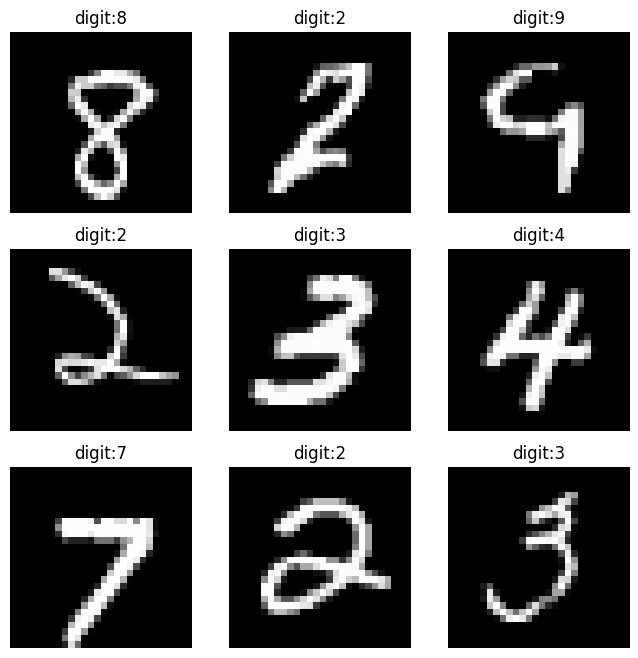

In [182]:
figure = plt.figure(figsize=(8, 8))

cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title("digit:" + str(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

#### Preparing your data for training with DataLoaders

In [183]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True)

#### Iterate through the DataLoader

Feature batch shape: torch.Size([4, 1, 28, 28])
Labels batch shape: torch.Size([4])


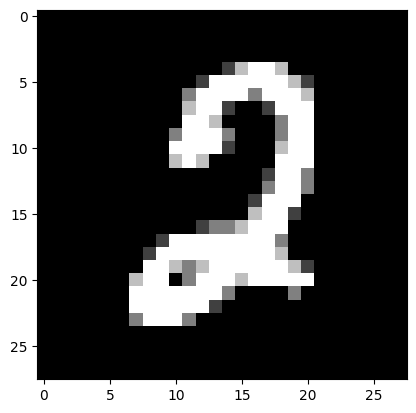

Label: 2


In [184]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### Train The Network

In [186]:
for epoch in range(2): 
    # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(torch.flatten(inputs,1))
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
            running_loss = 0.0
    print('Finished Training')

[1,  2000] loss: 0.369
[1,  4000] loss: 0.349
[1,  6000] loss: 0.337
[1,  8000] loss: 0.340
[1, 10000] loss: 0.346
[1, 12000] loss: 0.349
[1, 14000] loss: 0.331
Finished Training
[2,  2000] loss: 0.321
[2,  4000] loss: 0.307
[2,  6000] loss: 0.295
[2,  8000] loss: 0.304
[2, 10000] loss: 0.305
[2, 12000] loss: 0.304
[2, 14000] loss: 0.299
Finished Training


#### Task 4:  
What  is  the  meaning  of epoch,forward pass,backward pass.What  isthe effect of torch.flatten(inputs, 1),and optimizer.step()?

- **Epoch**
An epoch is one complete pass through the entire training dataset. When you train a model, you often go through the dataset multiple times to adjust the model's parameters and improve its performance. Each complete cycle through the dataset is called an epoch.

- **Forward Pass**
A forward pass is the process of passing the input data through the neural network to get the output (predictions). This involves computing the values at each layer of the network starting from the input layer and moving to the output layer.

- **Backward Pass**
A backward pass is the process of computing the gradients (how much each parameter should change) after the forward pass. This is done using a technique called backpropagation, which helps in minimizing the error by updating the model’s parameters. Essentially, it tells the model how to change to make better predictions.

- **Effect of torch.flatten(inputs, 1)**
The torch.flatten(inputs, 1) function takes the input tensor and flattens it starting from the first dimension. This means it converts a multi-dimensional input into a 2D tensor, where each input example becomes a single row. For example, if the input is a batch of images, this function will flatten each image into a single row vector, making it easier to feed into fully connected layers in a neural network.

- **optimizer.step()**
The optimizer.step() function updates the model’s parameters based on the computed gradients. After the forward and backward passes, the optimizer uses the gradients to adjust the parameters in an attempt to reduce the error. This step moves the parameters slightly in the direction that reduces the error, helping the model learn and improve over time.

#### save model

In [76]:
PATH ='./my_net.pth'
torch.save(net.state_dict(), PATH)

#### Test the network on the test data

##### Load the Model

In [77]:
net = Net()
net.load_state_dict(torch.load(PATH))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22232\238682776.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

##### Test

In [78]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(torch.flatten(images,1))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 89 %


#### Task 5:  
Train  the  network  in  the  previous  example,  but  instead  of  using  2  hiddenlayers, try 3 hidden layers.

In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        # # 784 is the input dimension, and 64 is the output dimenstion of the first hidden layer
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # apply the first layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [81]:
for epoch in range(2): 
    # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(torch.flatten(inputs,1))
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.303
[1,  6000] loss: 2.304
[1,  8000] loss: 2.304
[1, 10000] loss: 2.304
[1, 12000] loss: 2.304
[1, 14000] loss: 2.304
[2,  2000] loss: 2.304
[2,  4000] loss: 2.304
[2,  6000] loss: 2.304
[2,  8000] loss: 2.304
[2, 10000] loss: 2.304
[2, 12000] loss: 2.303
[2, 14000] loss: 2.305
Finished Training


#### Task 6:  
Train the network in the previous example using Adam optimizer.

In [108]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        # # 784 is the input dimension, and 64 is the output dimenstion of the first hidden layer
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # apply the first layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [109]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [110]:
for epoch in range(2): 
    # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(torch.flatten(inputs,1))
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
            running_loss = 0.0
            print('Finished Training')

[1,  2000] loss: 0.565
Finished Training
[1,  4000] loss: 0.299
Finished Training
[1,  6000] loss: 0.244
Finished Training


KeyboardInterrupt: 

### Training on GPU

In [192]:
device = torch.device('cuda:0'if torch.cuda.is_available() else'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [193]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        # # 784 is the input dimension, and 64 is the output dimenstion of the first hidden layer
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 64)
        self.fc6 = nn.Linear(64, 10)
        
    def forward(self, x):
        # apply the first layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        
        return x
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=10, bias=True)
)


In [194]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [195]:
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=10, bias=True)
)

#### Task 7:  
Train the network in the previous example on GPU. Do you notice significantspeedup?  if not, try to increase the size of your network.

In [196]:
for epoch in range(2): 
    # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Move inputs and labels to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(torch.flatten(inputs,1))
        iteration_loss = loss(outputs, labels)
        iteration_loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += iteration_loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
            running_loss = 0.0
    print('Finished Training')



            

[1,  2000] loss: 2.305
[1,  4000] loss: 2.303
[1,  6000] loss: 2.301
[1,  8000] loss: 2.300
[1, 10000] loss: 2.298
[1, 12000] loss: 2.298
[1, 14000] loss: 2.295
Finished Training
[2,  2000] loss: 2.292
[2,  4000] loss: 2.285
[2,  6000] loss: 2.278
[2,  8000] loss: 2.262
[2, 10000] loss: 2.225
[2, 12000] loss: 2.157
[2, 14000] loss: 2.031
Finished Training
